In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [12]:
# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train[:10000]
y_train = y_train[:10000]

In [13]:
# Parámetros
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
NUM_CLASSES = 10

In [14]:
# Función para preprocesar por lote
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [15]:
# Crear datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).map(preprocess).shuffle(1000).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).map(preprocess).batch(BATCH_SIZE)

In [16]:
# Modelo AlexNet simplificado
def build_alexnet(input_shape=(224, 224, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(48, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(3, strides=2),
        layers.Conv2D(128, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(3, strides=2),
        layers.Conv2D(192, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(192, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(3, strides=2),
        layers.Flatten(),
        layers.Dense(2048, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(2048, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [26]:
# Crear modelo
model = build_alexnet()

In [27]:
# Compilar
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# Entrenar
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5


313/313 ━━━━━━━━━━━━━━━━━━━━ 223s 689ms/step - accuracy: 0.1637 - loss: 2.1796 - val_accuracy: 0.3195 - val_loss: 1.8134
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 243s 777ms/step - accuracy: 0.3346 - loss: 1.7895 - val_accuracy: 0.4234 - val_loss: 1.5749
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 247s 789ms/step - accuracy: 0.4145 - loss: 1.5719 - val_accuracy: 0.4667 - val_loss: 1.4503
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 244s 779ms/step - accuracy: 0.4729 - loss: 1.4445 - val_accuracy: 0.5303 - val_loss: 1.3122
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 245s 784ms/step - accuracy: 0.5167 - loss: 1.3222 - val_accuracy: 0.5677 - val_loss: 1.2247


In [29]:
# Evaluar
test_loss, test_acc = model.evaluate(test_ds)
print(f'\nPrecisión en prueba: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.5716 - loss: 1.2154

Precisión en prueba: 56.77%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


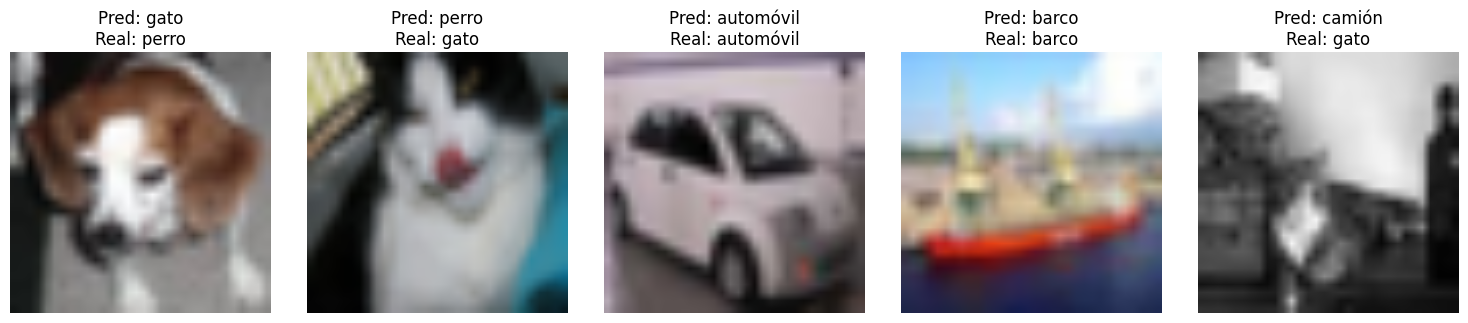

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Revolver el conjunto de prueba antes de tomar imágenes
shuffled_test_ds = test_ds.shuffle(1000)

# Tomar un lote aleatorio
for images, labels in shuffled_test_ds.take(1):
    preds = model.predict(images)
    preds_classes = np.argmax(preds, axis=1)
    images = images.numpy()

# Mostrar las imágenes
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Pred: {class_names[preds_classes[i]]}\nReal: {class_names[int(labels[i])]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
